### 載入工具

In [1]:
import os
import pandas as pd
from pandas import DataFrame
from keras.models import Sequential
from keras.layers import Dense, Activation, Convolution2D, MaxPooling2D, Flatten
from keras.optimizers import Adam
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.utils import np_utils
import matplotlib.pyplot as plt
# matplotlib.use("TkAgg")
%matplotlib inline
import numpy as np
np.random.seed(1)
from sklearn.metrics import confusion_matrix
from PIL import Image
import random
import math

Using TensorFlow backend.


### 資料：訓練集、測試集

In [2]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print('x_train\n', x_train.shape)
print('y_train\n', y_train.shape, y_train[0])

x_train
 (60000, 28, 28)
y_train
 (60000,) 5


In [3]:
# data pre-processing
x_train = x_train.reshape(-1, 28*28)/255.
x_test = x_test.reshape(-1, 28*28)/255.
y_train = np_utils.to_categorical(y_train, num_classes=10)
y_test = np_utils.to_categorical(y_test, num_classes=10)

### 建構 Model，修改成CNN

In [4]:
model = Sequential()
model.add(Dense(input_dim=28*28, units=1024, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.01), metrics=['accuracy'])

### 訓練 Model

In [5]:
model.fit(x_train, y_train, epochs=1, batch_size=64,)

Epoch 1/1
60000/60000 [==============================] - 5s 78us/step - loss: 0.2363 - acc: 0.9324


### 預測新資料

(256, 256)


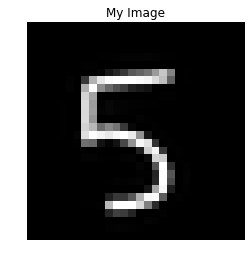

[[1.00539619e-05 3.61170223e-08 8.08167101e-07 6.70247851e-03
  1.27175645e-06 9.80665505e-01 5.84191640e-10 1.51099721e-06
  1.07821565e-04 1.25104971e-02]]
Predicted class : 5


In [6]:
im = Image.open("./my_image1.png")
print(np.array(im).shape)

im = im.resize((28, 28), Image.ANTIALIAS) #resize the image
im = np.array(im) #convert to an array
im2 = im/np.max(im).astype(float) #normalise input

plt.imshow(im2, cmap='gray')
plt.title('My Image')
plt.axis('off')
plt.show()

test_image = np.reshape(im2, [1,784]) # reshape it to our input placeholder shape

p_ = model.predict(test_image)
print(p_)
h_ = np.argmax(p_)
print("Predicted class : {}" .format(h_))